# Statistikk i Python 2 

In [7]:
import numpy as np
np.random.seed(1234)

Vi skal nå undersøke konfidensintervaller litt nærmere. Vi illustrerer konseptet med et eksempel.

Vi ønsker å si noe om den gjennomsnittlige IQ scoren til den norske befolkningen. <br> Vi kan ikke si noe om det sanne gjennomsnittet, fordi det ikke er praktisk mulig å måle IQ'en til hele befolkningen. Det vi derimot kan si noe om, er sannsynligheten for at den sanne verdien ligger i nærheten av gjennomsnittet for et utvalg innen et lite intervall.

NB. Et konfidensintervall beregnes ikke eksklusivt for gjennomsnitt. Du kan finne konfidensintervall for standardavvik, eller punkter på en regresjonslinje, slik vi gjør i $\textbf{Statistikk i Python 3}$.

## Konfidensintervaller 1

I dette programmet skal vi igjen utføre "målinger", dvs. trekke $N$ tilfeldige tall fra en normalfordeling med gjennomsnitt 10, og standardavvik 1. Deretter skal vi finne gjennomsnittet med tilhørende konfidensintervall. <br> 

"Målingene" er normalfordelte, men som vi har sett fra sentralgrenseteoremet, er $\textit{gjennomsnitt av målinger}$ nær normalfordelte, selv hvis selve målingene er f.eks uniformt fordelte på $[0,1]$, når $N$ er stor nok. Vi skal senere se på hvordan vi kan korrigere for at $N$ ikke er stor.  <br>

For normalfordelte variabler med forventning $\mu$ kan kan vise at $68\%$ av observert data ligger innenfor ett standardavvik fra $\mu$, samt at $95\%$ ligger innenfor to standardavvik fra $\mu$, og at $99\%$ ligger innenfor tre standardavvik fra $\mu$ (se figur under). Mer nøyaktig vil $95 \%$ av observert data ligge $1.96$ standardavvik fra $\mu$. <br>

<div>
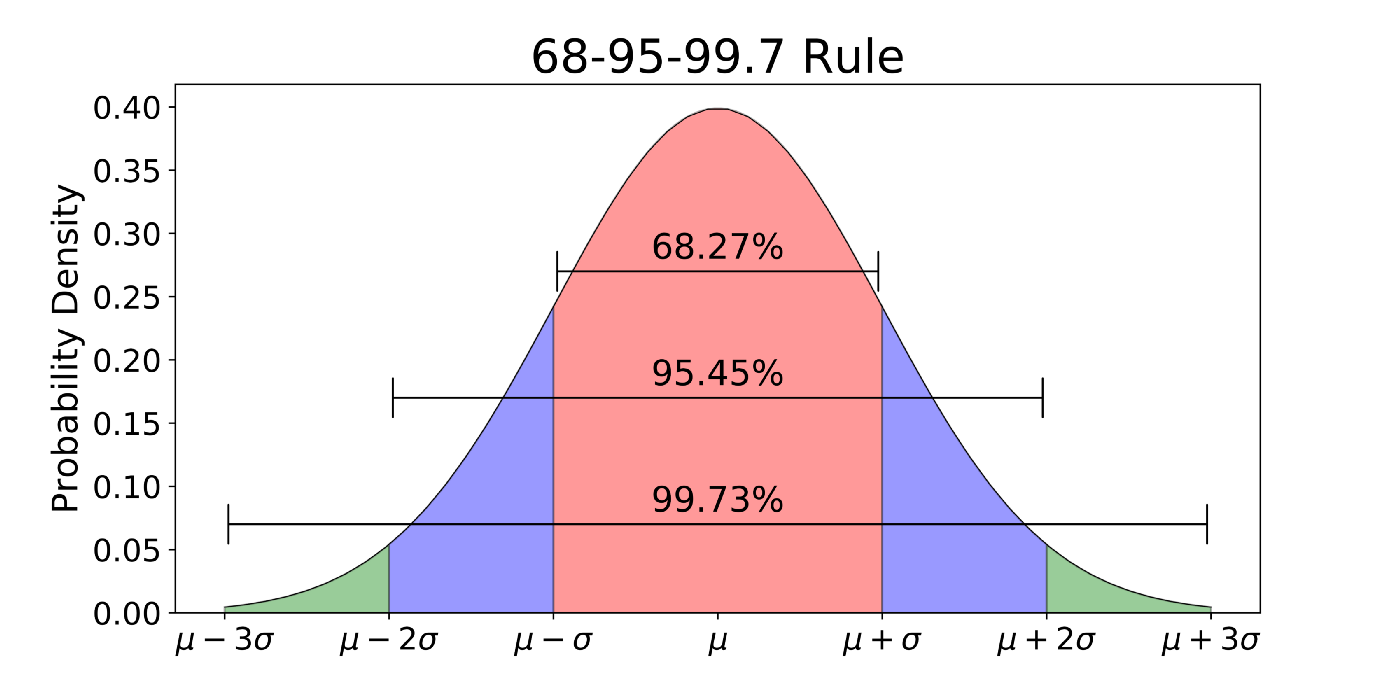
</div>

Gjennomsnittet $\bar x$ er normalfordelt med forventning lik den sanne verdien $X$ og standardavvik tilnærmet lik standardfeilen til gjennomsnittet (se kompendiet for formler). Derfor vet vi at $95 \%$ av gangene vi genererer et slikt gjennomsnitt, vil det ligge $1.96$ standardavvik fra $X$. Dette intervallet kan man invertere (utsagnet $a \in [x-c,x+c]$ er ekvivalent med $x \in [a-c, a+c]$), og man får at 

$$\bar{x}  \pm z \cdot SE(\bar x)$$

er et intervall som inneholder $X$ i $95 \%$ av gangene det regnes ut.

Dette er et konfidensintervall for $X$ med $\textbf{dekningsgrad}$ $95\%$. Da er det $95\%$ sannsynlig at konfidensintervallet inneholder den sanne verdien.

In [8]:
#Simulerer normalfordelte data med forventningsverdi 10 og standardavvik 1


def confidence_generator(N,print_=False):
    
    X = 10
    sigma = 1
    norm = sigma * np.random.randn(N) + X
    xMean = np.mean(norm)
    mean_stderr = np.std(norm, ddof = 1)/np.sqrt(N) #finner standardfeil i gjennomsnittet. 
    #ddof = 1 brukes siden np.std ikke deler på N-1 (som i formelen vi bruker for standardavvik) men N. 
    
    """
    Finner nedre og øvre grense for konfidensintervallet, med en 95% sannsynlighet
    for at sann verdi X ligger innenfor konfidensintervallet.
    Derfor multipliserer vi standardfeilen med 1.96.
    Se mer om konfidensintervaller i kompendiet.
    """
    lower_ci = xMean - 1.96 * mean_stderr
    upper_ci = xMean + 1.96 * mean_stderr
    if print_ == True:
        print("\nFor N = {}".format(N))
        print("xMean = {:.4}".format(xMean))
        print("Konfidensintervallet er mellom [{:.4},{:.4}]".format(lower_ci,upper_ci))
    return lower_ci,upper_ci,xMean


confidence_generator(100,True)


For N = 100
xMean = 10.04
Konfidensintervallet er mellom [9.839,10.23]


(9.83897490149855, 10.231249664752324, 10.035112283125438)

Nå ønsker vi å verifisere at konfidensintervallet stemmer, ved å sjekke om den sanne verdien $X = 10$ ligger innenfor konfidensintervallet $95\%$ av gangene.
Ved å utføre "eksperimenter", dvs. at vi repeterer prosessen med å hente ut N målinger fra normalfordelingen x ganger. For hvert eksperiment, er vi nødt til å lage et konfidensintervall, og undersøke om den sanne målingen 10, ligger innenfor dette konfidensintervallet. Først prøver vi med et tilfelle der vi har mange målinger per eksperiment, og lar $N = 100$.

In [3]:
N = 100  #antall vi trekker fra normalfordelingen
reps = 5000  #antall utførte eksperimenter
sum = 0  
for i in range(reps):
    #henter ut et konfidensintervall
    lower_ci_sim , upper_ci_sim,_ = confidence_generator(N) 
    #sjekker om 10 ligger innenfor konfidensintervallet
    if lower_ci_sim <= 10 <= upper_ci_sim: 
        sum += 1


print("\n {}% av konfidensintervallene inneholder sann verdi".format((sum/reps*100)))


 95.52000000000001% av konfidensintervallene inneholder sann verdi


La oss nå se hva som skjer når vi har færre antall målinger, nemlig ti:

In [4]:
N = 10  #antall vi trekker fra normalfordelingen
reps = 5000  #antall utførte eksperimenter
sum = 0  
for i in range(reps):
    #henter ut et konfidensintervall
    lower_ci_sim , upper_ci_sim,_ = confidence_generator(N) 
    #sjekker om 10 ligger innenfor konfidensintervallet
    if lower_ci_sim <= 10 <= upper_ci_sim: 
        sum += 1
print("\n {}% av konfidensintervallene inneholder sann verdi".format((sum/reps*100)))


 91.75999999999999% av konfidensintervallene inneholder sann verdi


Her ser vi at når vi har få målinger, vil sann verdi (som er 10) bare være innenfor det genererte konfidensintervallet $\ 91-92 \%$ av gangene.

Det er to årsaker til at intervallet kan være feil: For det første bruker argumentet vårt sentralgrenseteoremet, og den holder kun når vi har mange nok observasjoner. For det andre, er standardfeilen til gjennomsnittet kun en approksimasjon til det eksakte standardavviket til gjennomsnittet. 

Når vi har normalfordelte målinger er gjennomsnittsmålingene nøyaktig normalfordelt. Derfor er det i vår simulering kun problem nummer to over som er aktuelt. For å korrigere dette må vi ta hensyn til at standardfeilen er en tilnærming som for et lavt antall målinger ikke er helt presis, og tilnærmingen introduserer en del variasjon.

## Konfidensintervaller2.py 

Vi skal nå anta at målingene våre er normalfordelte. Husk at det vil si at hvis vi utfører ett eksperiment og tar flere og flere målinger og så lager et histogram av målingene, vil histogrammet følge den normale tetthetskurven.

La oss gå tilbake til problemet over: Vi har normalfordelte målinger, men få av dem. Konfidensintervallet

$$
\bar x \pm 1.96 SE(\bar x)
$$

så vi inneholdt sann måling $X$ for få ganger, det vil si intervallet for smalt. Problemet kommer av at $\text{SE}(\bar x)$ kun er en tilnærming, og tilnærmingen ikke er god nok. Siden målingene er antatt å være normalfordelt kan man regne seg frem til et intervall som fungerer (denne utregningen er ikke pensum), og det viser seg at den eneste endringen man trenger å gjøre, er å erstatte $1.96$ med et tall som avhenger av antall målinger man har. Når man har veldig mange målinger, vil dette tallet være lik $1.96$, ellers vil det være høyere. 

For å finne dette tallet kan vi bruke stats pakken fra scipy biblioteket.

$\textbf{scipy.stats.t.ppf(q,df)}$. 

der $q = 0.975$ og $\text{df} = N-1$

For en annen dekningsgrad enn $95 \%$, men en dekningsgrad på $1 - \alpha$, blir i steden $q=1-(\alpha/2)$.





La oss nå finne konfidensintervallet med t-fordelingen:

In [5]:
from scipy import stats
N = 10
sigma = 1
X = 10
#utfører målinger
norm = sigma*np.random.randn(N) + X
mean = np.mean(norm)

alpha = 0.05 #tilsvarer 95% dekningsgrad.
CI_coeff = stats.t.ppf(1-(alpha/2),N-1) #finner t-score for 95% dekningsgrad

lower_ci = mean - CI_coeff * np.std(norm, ddof = 1 )/np.sqrt(N)
upper_ci = mean + CI_coeff * np.std(norm, ddof = 1)/np.sqrt(N)

print("CI coefficient: {:.2f}".format(CI_coeff))
print("Konfidensintervall med t-distribution og N = {} er [{:.2f},{:.2f}]".format(N,lower_ci,upper_ci))

CI coefficient: 2.26
Konfidensintervall med t-distribution og N = 10 er [9.30,11.17]


La oss verifisere at dette intervallet har riktig dekningsgrad også med et lavt antall målinger. Husk at vi har normalfordelte målinger!

In [6]:
reps = 5000
sum = 0
for i in range(reps):
    xSim = sigma*np.random.randn(N) + X
    xMean = np.mean(xSim)
    lower_ci_sim = xMean - CI_coeff * np.std(xSim, ddof = 1)/np.sqrt(N)
    upper_ci_sim = xMean + CI_coeff * np.std(xSim, ddof = 1)/np.sqrt(N)
    if lower_ci_sim <= 10 <= upper_ci_sim:
        sum += 1
print("\n {}% av konfidensintervallene inneholder sann verdi".format((sum/reps*100)))


 95.22% av konfidensintervallene inneholder sann verdi


Ja! Nå treffer vi mye bedre.